<a href="https://colab.research.google.com/github/prnt84/The-Emotion-Story/blob/main/Picpredict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install git+git://github.com/PnS2019/pnslib.git



  Cloning git://github.com/PnS2019/pnslib.git to /tmp/pip-req-build-u9c69xn8
  Running command git clone -q git://github.com/PnS2019/pnslib.git /tmp/pip-req-build-u9c69xn8
  Created wheel for pnslib: filename=pnslib-0.1.0a1-cp37-none-any.whl size=1489618 sha256=3ed5eddea153d5501cd0e435da0580f05c1fbc570c97cfe03c26a3a5955ead85
  Stored in directory: /tmp/pip-ephem-wheel-cache-4i1yibvh/wheels/a2/8e/a9/c62e72840009deaa723b3a113d5c3b90acac77098d16e90eca
Successfully built pnslib


In [ ]:
pip install constants

  Created wheel for constants: filename=constants-0.6.0-cp37-none-any.whl size=5459 sha256=7aa3f53e9e1850bfcc4176d5b78f879bc9847029428fb91b5e5ca6849ba5598f
  Stored in directory: /root/.cache/pip/wheels/75/a1/25/7e051dae7d8fb9db1c04b0fe309a8bea40111080d3b62f1ca9
Successfully built constants


In [ ]:
!wget https://pns2019.github.io/images/Lenna.png

--2021-05-13 06:39:56--  https://pns2019.github.io/images/Lenna.png
Resolving pns2019.github.io (pns2019.github.io)... 185.199.108.153, 185.199.109.153, 185.199.110.153, ...
Connecting to pns2019.github.io (pns2019.github.io)|185.199.108.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 473831 (463K) [image/png]
Saving to: ‘Lenna.png’

Lenna.png           100%[===================>] 462.73K  --.-KB/s    in 0.02s   

2021-05-13 06:39:57 (18.2 MB/s) - ‘Lenna.png’ saved [473831/473831]



In [ ]:
#to capture images from the camera on google colab
#taken from colab documentation
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

  from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

  #saved to photo.jpg in the current directory

<IPython.core.display.Javascript object>

Saved to photo.jpg


[[3.0100312e-02 3.1147580e-04 1.8283303e-01 4.2560327e-01 1.9539125e-02
  3.1063509e-01 3.0977694e-02]] happy


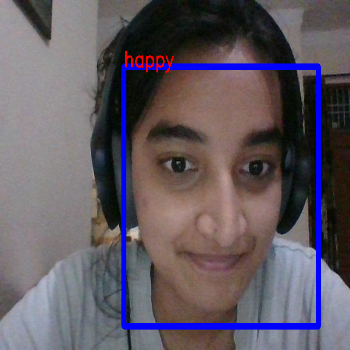

In [ ]:
#importing the necessary libraries
from keras.models import model_from_json
import cv2
from constants import *
import numpy as np
from google.colab.patches import cv2_imshow
from pnslib import utils
import os
from keras.preprocessing.image import img_to_array
 
#load model
model = model_from_json(open("/content/drive/My Drive/fernew2.json", "r").read())
#load weights
model.load_weights('/content/drive/My Drive/fernew2.h5')
 
#using the Haar Cascades classifier 
face_haar_cascade = cv2.CascadeClassifier(utils.get_haarcascade_path('haarcascade_frontalface_default.xml'))
 
 
#a function to detect faces using opencv and predict their emotion
def image_pred(test_image):
  test_img = cv2.imread(test_image) #reading the test image
  gray_img= cv2.cvtColor(test_img, cv2.COLOR_BGR2GRAY) #converting to grayscale
  faces_detected = face_haar_cascade.detectMultiScale(gray_img, scaleFactor=1.32, minNeighbors=5) 
  for (x,y,w,h) in faces_detected:
    cv2.rectangle(test_img,(x,y),(x+w,y+h),(255,0,0),thickness=7) #for the rectangular grid around the cropped face
    roi_gray=gray_img[y:y+h,x:x+w]  #cropping face area from  image
    roi_gray=cv2.resize(roi_gray,(48,48))
    img_pixels = img_to_array(roi_gray)
    img_pixels = np.expand_dims(img_pixels, axis = 0)
    img_pixels = 255
    predictions = model.predict(img_pixels) #predicting on the processed test image
    #find max indexed array
    max_index = np.argmax(predictions[0]) 
    emotions = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral') #labels
    predicted_emotion = emotions[max_index] 
    print(predictions, predicted_emotion)
    cv2.putText(test_img, predicted_emotion, (int(x), int(y)), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255), 2) #for the text labelling the emotion
  t_image = cv2.resize(test_img, (350, 350)) #resize the final output
  cv2_imshow(t_image) #to display the final output
 
#the picture we captured from webcam
image_pred(filename)

[[2.1166716e-06 4.8180925e-12 1.4990087e-03 1.6513565e-07 9.8751549e-08
  9.9849856e-01 2.1803176e-08]] surprise
[[0.10852889 0.00093587 0.14491521 0.01246632 0.23736231 0.02064701
  0.47514442]] neutral
[[1.4447839e-02 5.1555639e-06 1.6453678e-02 6.0408545e-01 4.3637387e-02
  7.9303319e-03 3.1344020e-01]] happy
[[0.13050067 0.00099642 0.11773349 0.01179351 0.23166479 0.01055664
  0.49675447]] neutral
[[8.81827378e-04 1.05653986e-09 9.15498415e-04 8.86598170e-01
  5.02335420e-03 2.53594771e-04 1.06327645e-01]] happy
[[2.3787683e-01 7.0124167e-01 5.5449683e-02 3.1356589e-07 5.0077350e-03
  3.9603680e-04 2.7707189e-05]] disgust
[[0.12024887 0.0010812  0.14332359 0.00807009 0.3217625  0.0069331
  0.39858058]] neutral
[[0.11071333 0.00216049 0.18876344 0.0037922  0.5449561  0.00305636
  0.1465581 ]] sad
[[4.1983597e-02 8.8866735e-05 3.9342932e-02 4.9342084e-01 8.7385342e-02
  1.5178119e-02 3.2260022e-01]] happy


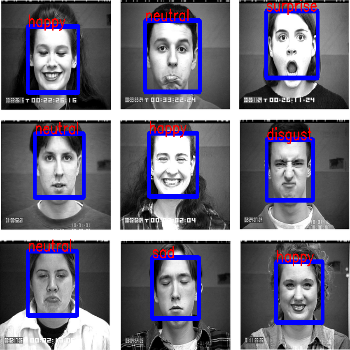

In [ ]:
image_pred("/content/drive/My Drive/ck.png")

[[0.07066627 0.00419706 0.38526046 0.00320015 0.4831553  0.00887664
  0.04464417]] sad


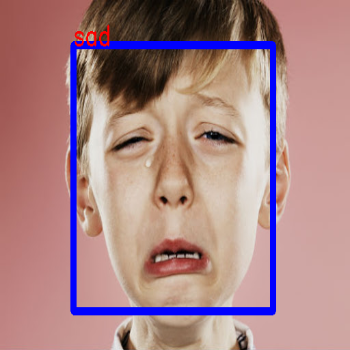

In [ ]:
image_pred("/content/drive/My Drive/unnamed.jpg")


[[1.02083695e-05 1.19211214e-14 1.60519794e-05 9.97533202e-01
  1.25672377e-04 1.55033320e-06 2.31331098e-03]] happy


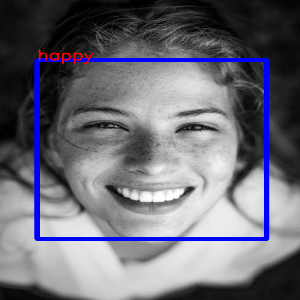

In [ ]:
image_pred("/content/drive/My Drive/gh.jpeg (489×627)")

[[5.4082889e-02 2.5889126e-04 6.7593627e-02 5.2003819e-01 8.8903770e-02
  3.4638528e-02 2.3448408e-01]] happy


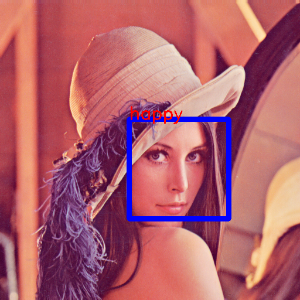

In [ ]:
image_pred("Lenna.png")

[[2.4858963e-01 6.8513215e-01 6.0444809e-02 4.5910198e-07 5.2950685e-03
  5.0370512e-04 3.4120167e-05]] disgust


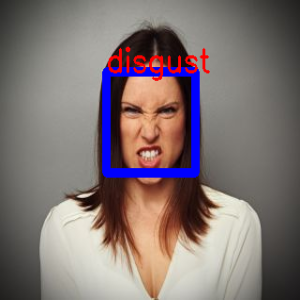

In [ ]:
image_pred("/content/drive/My Drive/DMUbjq2UjJcG3umGv3Qjjd-320-80.jpeg")

[[0.35857376 0.28021586 0.30525535 0.00089781 0.03721212 0.01580392
  0.00204113]] angry


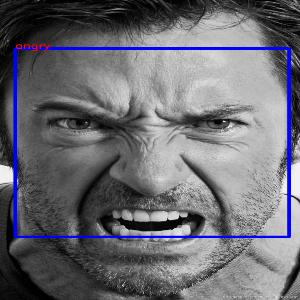

In [ ]:
image_pred("/content/drive/My Drive/412ce07cad422f67009122c1372cc1fe.jpg")

[[0.09686864 0.00270147 0.2503719  0.02675914 0.1784922  0.27624834
  0.1685583 ]] surprise


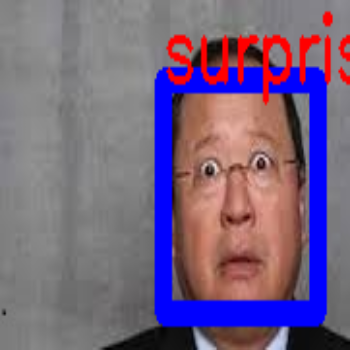

In [ ]:
image_pred("/content/drive/My Drive/download (1).jpg")

[[7.5469777e-02 5.5059925e-05 7.6285020e-02 4.3242718e-03 1.7960906e-01
  2.6137943e-03 6.6164297e-01]] neutral


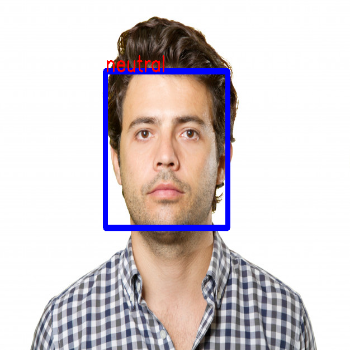

In [ ]:
image_pred("/content/drive/My Drive/young-man-isolated-neutral-face_75922-474.jpg")

[[3.4286287e-01 5.3039402e-01 1.0771131e-01 1.1264192e-05 1.6270086e-02
  2.4220918e-03 3.2842156e-04]] disgust
[[0.41892973 0.24272707 0.20379907 0.00170519 0.10341763 0.01650377
  0.01291752]] angry
[[1.5524347e-01 8.0650550e-01 3.6239095e-02 2.1599055e-08 1.8875181e-03
  1.2051015e-04 3.9008887e-06]] disgust


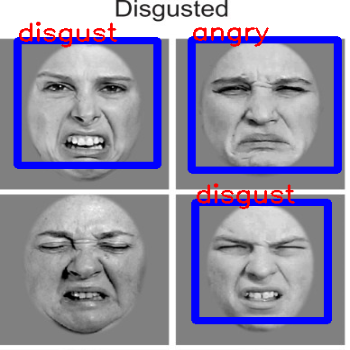

In [ ]:
image_pred("/content/drive/My Drive/Base-face-images-with-disgusted-and-fearful-expressions-used-in-the-experiment.png")

[[1.06152885e-01 4.47982922e-04 1.19492635e-01 7.77992280e-03
  2.78014511e-01 5.13081858e-03 4.82981205e-01]] neutral
[[0.19962287 0.01259516 0.29227355 0.01747466 0.32437518 0.03089154
  0.12276712]] sad
[[0.14772406 0.01217104 0.31550014 0.05174716 0.14660633 0.2303878
  0.09586351]] fear
[[0.27477333 0.03425711 0.25888625 0.01740468 0.28657934 0.02661765
  0.10148168]] sad
[[1.4676278e-03 6.1993893e-07 9.6449099e-02 3.0627625e-02 1.1255601e-03
  8.6787850e-01 2.4509162e-03]] surprise
[[3.4101643e-03 5.6151460e-08 4.0841927e-03 8.8885891e-01 1.2387277e-02
  1.2360860e-03 9.0023242e-02]] happy


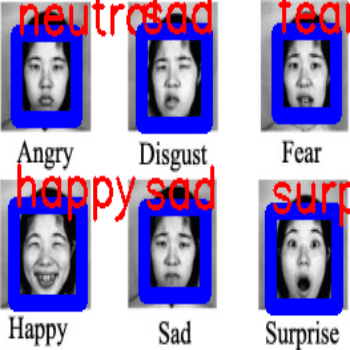

In [ ]:
image_pred("/content/drive/My Drive/1-s2.0-S1319157818303379-gr2.jpg")